
# 🧪 Resistive Sensors

## 1. Introduction
**Resistive sensors** change their electrical resistance as a function of some physical quantity.

**Examples:**
- Light Dependent Resistor (LDR) → light
- NTC / PTC thermistor → temperature
- Strain gauge → mechanical strain
- Potentiometer → position
- Magnetoresistive sensor → magnetic field
- Heated metal-oxide VOC sensor → gas concentration

Typically used in a voltage divider circuit → measured by ADC in a microcontroller.


## 2. NTC Thermistor Sensors

### 2.1 What is an NTC Thermistor
- An **NTC (Negative Temperature Coefficient)** thermistor is a resistor whose resistance decreases as temperature increases.  
- It is widely used for temperature measurement because it is cheap, reasonably accurate, and offers high sensitivity over limited temperature ranges.  
- Key parameters include:
  - **R₀** or **R(₂₅°C)**: resistance at a reference temperature (often 25 °C).  
  - **B-constant** (or B value): describes how steep the resistance vs. temperature curve is.  
  - Operating temperature range.  
  - Tolerance, self-heating, dissipation constant, etc.

### 2.2. The R-T Curve & B Constant
The resistance of an NTC thermistor can be approximated with the **B-parameter model**:

$$
R(T) = R_0 \cdot \exp\!\Bigg( B \cdot \left(\frac{1}{T} - \frac{1}{T_0}\right) \Bigg)
$$

where:
- $ R(T) $ = resistance at temperature $ T $ (Kelvin)  
- $ R_0 $ = resistance at reference temperature $ T_0 $ (Kelvin, often 25 °C = 298.15 K)  
- $ B $ = B constant (Kelvin)

Datasheets often provide lookup tables of resistance vs. temperature. The model is useful for interpolation and quick calculation.

### 2.3. Example: 10 kΩ NTC Thermistor (B25/50 = 3950K)

Below is a typical datasheet table for a 10 kΩ NTC (R at 25 °C ≈ 10 kΩ, B = 3950 K):

| Temperature (°C) | Resistance (kΩ) |
|------------------|-----------------|
| -40              | 277.2           |
| -30              | 157.2           |
| -20              | 87.43           |
| -10              | 54.50           |
| 0                | 32.65           |
| 10               | 19.90           |
| 20               | 12.49           |
| 25               | 10.00           |
| 30               | 8.057           |
| 40               | 5.327           |
| 50               | 3.603           |
| 60               | 2.488           |
| 70               | 1.751           |
| 80               | 1.255           |
| 90               | 0.915           |
| 100              | 0.678           |



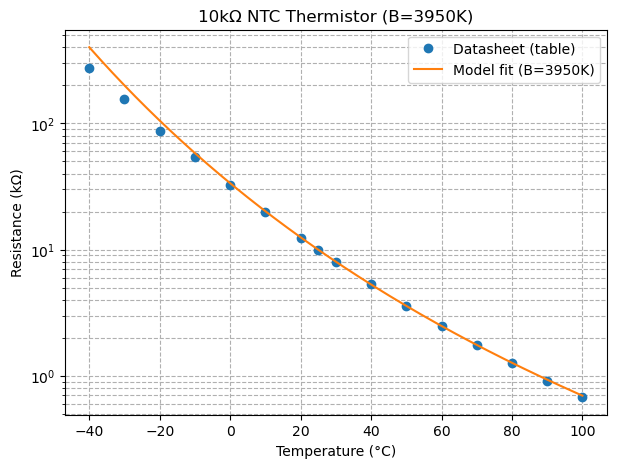

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Datasheet values (10k NTC, B=3950K)
ntc_data = {
    "Temp_C":  [-40, -30, -20, -10, 0, 10, 20, 25, 30, 40, 50, 60, 70, 80, 90, 100],
    "Resistance_kOhm": [277.2, 157.2, 87.43, 54.50, 32.65,
                        19.90, 12.49, 10.00, 8.057, 5.327,
                        3.603, 2.488, 1.751, 1.255, 0.915, 0.678]
}
df = pd.DataFrame(ntc_data)

# Model parameters
R0 = 10_000     # ohms at 25 °C
T0 = 25 + 273.15 # K
B = 3950        # K

# Function for NTC resistance
def ntc_resistance(temp_C):
    T = temp_C + 273.15
    return R0 * np.exp(B * ((1/T) - (1/T0)))

# Generate smooth curve
temps = np.linspace(-40, 100, 300)
R_model = ntc_resistance(temps) / 1000  # convert to kΩ for plotting

# Plot
plt.figure(figsize=(7,5))
plt.plot(df["Temp_C"], df["Resistance_kOhm"], "o", label="Datasheet (table)")
plt.plot(temps, R_model, "-", label=f"Model fit (B={B}K)")
plt.yscale("log")
plt.xlabel("Temperature (°C)")
plt.ylabel("Resistance (kΩ)")
plt.title("10kΩ NTC Thermistor (B=3950K)")
plt.grid(True, which="both", linestyle="--")
plt.legend()
plt.show()

### 2.4. Tolerance of NTC Thermistors

NTC thermistors are not exact — their resistance vs. temperature curve has **tolerance**.  
Typical datasheets specify:

- **Resistance tolerance at 25 °C (R25):** often ±1%, ±3%, or ±5%.  
  Example: a "10 kΩ ±1%" thermistor may be anywhere between 9.9 kΩ and 10.1 kΩ at 25 °C.  

- **B-constant tolerance:** typically ±1% to ±3%.  
  This affects the slope of the curve and creates increasing error as you move away from 25 °C.  

- **Combined effect:**  
  The result is that the actual resistance vs. temperature curve can deviate above or below the nominal curve.  
  For critical applications, calibration against known temperature points is often performed.

As an example, consider a 10 kΩ, B=3950 K thermistor with **±1% R25 tolerance**.  
At 25 °C, the nominal resistance is 10.00 kΩ, but could range from 9.90 kΩ to 10.10 kΩ.  
At other temperatures, the absolute error in ohms grows larger because the curve shifts up or down.


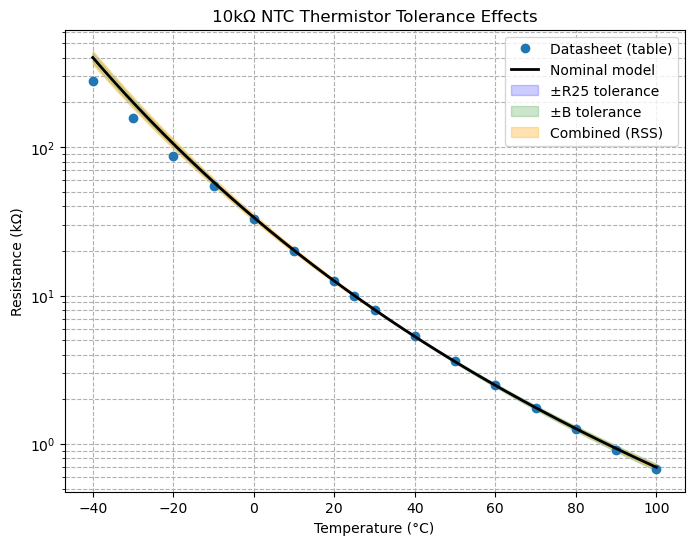

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Datasheet values (10k NTC, B=3950K)
ntc_data = {
    "Temp_C":  [-40, -30, -20, -10, 0, 10, 20, 25, 30, 40, 50, 60, 70, 80, 90, 100],
    "Resistance_kOhm": [277.2, 157.2, 87.43, 54.50, 32.65,
                        19.90, 12.49, 10.00, 8.057, 5.327,
                        3.603, 2.488, 1.751, 1.255, 0.915, 0.678]
}
df = pd.DataFrame(ntc_data)

# Model parameters
R0 = 10_000     # ohms at 25 °C
T0 = 25 + 273.15 # K
B_nom = 3950    # K

def ntc_resistance(temp_C, R0=R0, B=B_nom):
    T = temp_C + 273.15
    return R0 * np.exp(B * ((1/T) - (1/T0)))

temps = np.linspace(-40, 100, 300)
R_nom = ntc_resistance(temps) / 1000  # in kΩ

# Tolerances
tol_R25 = 0.01   # ±1% R25 tolerance
tol_B   = 0.02   # ±2% B tolerance

# --- Effect of R25 tolerance ---
R_high_R25 = ntc_resistance(temps, R0=R0*(1+tol_R25)) / 1000
R_low_R25  = ntc_resistance(temps, R0=R0*(1-tol_R25)) / 1000

# --- Effect of B tolerance ---
R_high_B = ntc_resistance(temps, B=B_nom*(1+tol_B)) / 1000
R_low_B  = ntc_resistance(temps, B=B_nom*(1-tol_B)) / 1000

# --- Combined effect (RSS) ---
rss = np.sqrt(tol_R25**2 + tol_B**2)
R_high_combined = ntc_resistance(temps, R0=R0*(1+rss), B=B_nom*(1+rss)) / 1000
R_low_combined  = ntc_resistance(temps, R0=R0*(1-rss), B=B_nom*(1-rss)) / 1000

# Plot
plt.figure(figsize=(8,6))
plt.plot(df["Temp_C"], df["Resistance_kOhm"], "o", label="Datasheet (table)")
plt.plot(temps, R_nom, "k-", lw=2, label="Nominal model")

# Shaded bands
plt.fill_between(temps, R_low_R25, R_high_R25, color="blue", alpha=0.2, label="±R25 tolerance")
plt.fill_between(temps, R_low_B, R_high_B, color="green", alpha=0.2, label="±B tolerance")
plt.fill_between(temps, R_low_combined, R_high_combined, color="orange", alpha=0.3, label="Combined (RSS)")

plt.yscale("log")
plt.xlabel("Temperature (°C)")
plt.ylabel("Resistance (kΩ)")
plt.title("10kΩ NTC Thermistor Tolerance Effects")
plt.grid(True, which="both", linestyle="--")
plt.legend()
plt.show()


## 3. Translating Resistance into Voltage

Microcontrollers and other circuits measure **voltage**, not resistance directly.

A resistive sensor is connected as a **voltage divider**:
$$
U_{ID0} = U_{ref} \times \frac{R_{TH1}}{R_{R1}+R_{TH1}} 
$$

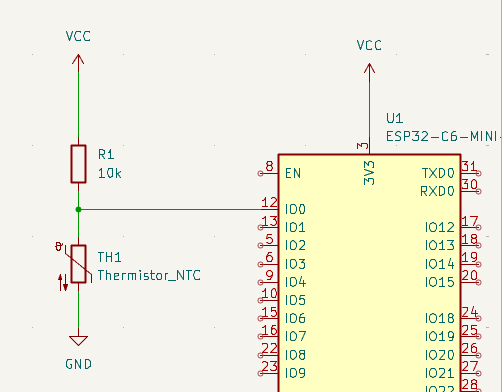


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

def plot_voltage(R_fixed=10000, U_ref=5.0):
    R_sensor = np.linspace(1000, 100000, 500)
    U = U_ref * (R_sensor / (R_fixed + R_sensor))
    plt.figure(figsize=(6,4))
    plt.plot(R_sensor, U)
    plt.xlabel("Sensor Resistance (Ω)")
    plt.ylabel("ADC Input Voltage (V)")
    plt.title("Voltage Divider Transfer Curve")
    plt.grid(True)
    plt.show()

interact(plot_voltage, R_fixed=(1000,100000,1000), U_ref=(1.0,5.0,0.1))

interactive(children=(IntSlider(value=10000, description='R_fixed', max=100000, min=1000, step=1000), FloatSli…

<function __main__.plot_voltage(R_fixed=10000, U_ref=5.0)>


## 3. NTC Thermistor Example

NTC = Negative Temperature Coefficient → resistance decreases with temperature.

Example:
- 0 °C → 30 kΩ
- 40 °C → 6 kΩ

We can simulate how the resistance maps to voltage and then to ADC counts.


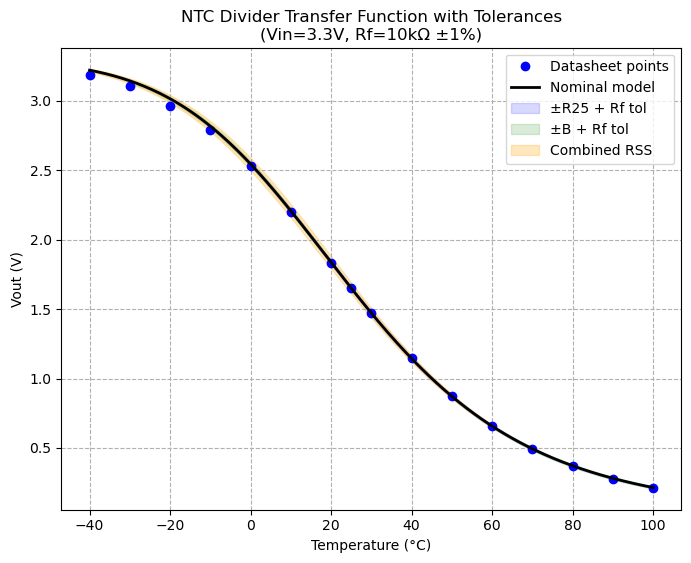

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Datasheet values (10k NTC, B=3950K) ---
ntc_data = {
    "Temp_C":  [-40, -30, -20, -10, 0, 10, 20, 25, 30, 40, 50, 60, 70, 80, 90, 100],
    "Resistance_kOhm": [277.2, 157.2, 87.43, 54.50, 32.65,
                        19.90, 12.49, 10.00, 8.057, 5.327,
                        3.603, 2.488, 1.751, 1.255, 0.915, 0.678]
}
df = pd.DataFrame(ntc_data)

# --- Parameters ---
Vin = 3.3
R0 = 10_000     # ohms at 25 °C
T0 = 25 + 273.15
B_nom = 3950    # K
Rf_nom = 10_000 # fixed resistor nominal (ohms)

# Tolerances
tol_R25 = 0.01  # ±1%
tol_B   = 0.02  # ±2%
tol_Rf  = 0.01  # ±1% fixed resistor

# --- NTC model ---
def ntc_resistance(temp_C, R0=R0, B=B_nom):
    T = temp_C + 273.15
    return R0 * np.exp(B * ((1/T) - (1/T0)))

def divider_voltage(R_ntc, Rf, Vin=Vin):
    return Vin * R_ntc / (R_ntc + Rf)

# --- Nominal curve ---
temps = np.linspace(-40, 100, 300)
R_nom = ntc_resistance(temps)
V_nom = divider_voltage(R_nom, Rf_nom)

# --- Tolerance bands ---
# R25 effect
R_high_R25 = ntc_resistance(temps, R0=R0*(1+tol_R25))
R_low_R25  = ntc_resistance(temps, R0=R0*(1-tol_R25))
V_high_R25 = divider_voltage(R_high_R25, Rf_nom*(1-tol_Rf))  # worst-case: R25 high + Rf low
V_low_R25  = divider_voltage(R_low_R25,  Rf_nom*(1+tol_Rf))  # worst-case: R25 low + Rf high

# B effect
R_high_B = ntc_resistance(temps, B=B_nom*(1+tol_B))
R_low_B  = ntc_resistance(temps, B=B_nom*(1-tol_B))
V_high_B = divider_voltage(R_high_B, Rf_nom*(1-tol_Rf))
V_low_B  = divider_voltage(R_low_B,  Rf_nom*(1+tol_Rf))

# Combined effect (RSS of tolerances)
rss = np.sqrt(tol_R25**2 + tol_B**2 + tol_Rf**2)
R_high_comb = ntc_resistance(temps, R0=R0*(1+rss), B=B_nom*(1+rss))
R_low_comb  = ntc_resistance(temps, R0=R0*(1-rss), B=B_nom*(1-rss))
V_high_comb = divider_voltage(R_high_comb, Rf_nom*(1-rss))
V_low_comb  = divider_voltage(R_low_comb,  Rf_nom*(1+rss))

# --- Datasheet voltages ---
V_datasheet = divider_voltage(df["Resistance_kOhm"].values*1000, Rf_nom)

# --- Plot ---
plt.figure(figsize=(8,6))
plt.plot(df["Temp_C"], V_datasheet, "bo", label="Datasheet points")
plt.plot(temps, V_nom, "k-", lw=2, label="Nominal model")

# Fill tolerance regions
plt.fill_between(temps, V_low_R25, V_high_R25, color="blue", alpha=0.15, label="±R25 + Rf tol")
plt.fill_between(temps, V_low_B,   V_high_B,   color="green", alpha=0.15, label="±B + Rf tol")
plt.fill_between(temps, V_low_comb, V_high_comb, color="orange", alpha=0.25, label="Combined RSS")

plt.xlabel("Temperature (°C)")
plt.ylabel("Vout (V)")
plt.title("NTC Divider Transfer Function with Tolerances\n(Vin=3.3V, Rf=10kΩ ±1%)")
plt.grid(True, linestyle="--")
plt.legend()
plt.show()


## 4. Measuring voltages using microcontroller and ADC

**built-in ADC resolution example (ESP32C6):**
- 12-bit ADC → 4096 steps
- measurement range with 11dB attenuation setting = 3.1 V → LSB ≈ 0.76 mV

**LSB** refers to Least Significant Bit, i.e. how much input voltage must increase to add digital output by one LSB.

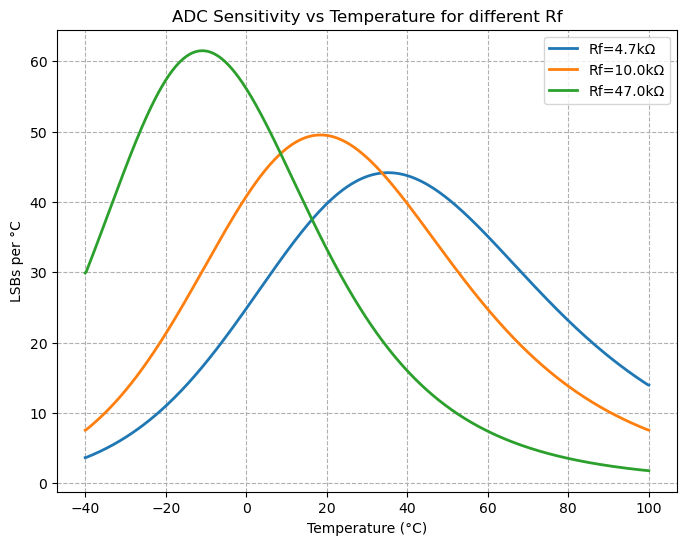

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# --- Parameters ---
Vin = 3.3
Vref = 3.1   # ADC reference voltage
ADC_bits = 12
ADC_steps = 2**ADC_bits
V_LSB = Vref / ADC_steps   # voltage step size of ADC

R0 = 10_000     # NTC at 25°C
T0 = 25 + 273.15
B_nom = 3950    # B constant (K)

def R_ntc(temp_C, R0=R0, B=B_nom):
    """NTC resistance model using B-parameter equation"""
    T = temp_C + 273.15
    return R0 * np.exp(B*((1/T) - (1/T0)))

def V_out(temp_C, Rf, Vin=Vin):
    """Voltage divider output: NTC in series with fixed resistor"""
    R = R_ntc(temp_C)
    return Vin * R / (Rf + R)

# Temperature range for analysis
temps = np.linspace(-40, 100, 500)

# --- Choose input mode ---
# Single resistor
# Rf_list = [10_000]

# Multiple resistors to compare
Rf_list = [4700, 10_000, 47_000]

# --- Plotting ---
plt.figure(figsize=(8,6))

for Rf_nom in Rf_list:
    # Compute voltage curve
    V = [V_out(T, Rf_nom) for T in temps]
    
    # Compute derivative (sensitivity dV/dT)
    dVdT = np.gradient(V, temps)
    
    # Convert to ADC units (LSBs per °C)
    lsb_per_deg = np.abs(dVdT / V_LSB)
    
    # Plot curve for this Rf
    plt.plot(temps, lsb_per_deg, lw=2, label=f"Rf={Rf_nom/1000:.1f}kΩ")

# --- Plot formatting ---
plt.xlabel("Temperature (°C)")
plt.ylabel("LSBs per °C")
plt.title("ADC Sensitivity vs Temperature for different Rf")
plt.grid(True, which="both", linestyle="--")
plt.legend()
plt.show()


## 5. Sources of Error

- Tolerance of the NTC and fixed resistor
- ADC reference voltage stability
- Quantization error (resolution)
- Nonlinearity of voltage divider
- Self-heating of sensor
- Aging and drift



## 6. Back-Conversion: From ADC Counts to Temperature

Once we know the forward signal flow (Temperature → Resistance → Voltage Divider → ADC counts), 
we need the **inverse function** to recover Temperature from a measured ADC value. The microcontroller code must implement that in order to display the temperature.

### 6.1. Forward transfer function

1. NTC resistance:
$$
R_{NTC}(T) = R_0 \cdot \exp\!\Big( B \cdot \Big(\tfrac{1}{T} - \tfrac{1}{T_0}\Big) \Big)
$$

2. Divider voltage:
$$
V_{out}(T) = V_{in} \cdot \frac{R_{NTC}(T)}{R_{NTC}(T) + R_f}
$$

3. ADC code (12-bit):
$$
\text{ADC}(T) = \frac{V_{out}(T)}{V_{ref}} \cdot (2^{12}-1)
$$

where:
- $R_0$ = reference resistance at $T_0$ (e.g. 10 kΩ at 25 °C = 298.15 K)  
- $B$ = thermistor constant (e.g. 3950 K)  
- $R_f$ = fixed divider resistor  
- $V_{in}$ = divider supply voltage  
- $V_{ref}$ = ADC reference voltage  

### 6.2. Why inversion is not trivial

The ADC value depends on $R_{NTC}(T)$ inside a **non-linear exponential** and a **voltage divider ratio**.  
This cannot be inverted with a simple arithmetic formula.

Therefore, direct back-conversion is not possible in closed form.  

### 6.3. Practical approaches

1. **Lookup Table + Interpolation**  
   - Precompute ADC vs. Temperature.  
   - Store table in firmware.  
   - Use linear interpolation between points.  
   - **Most common in embedded systems.**

2. **Steinhart–Hart Equation**  
   - A refined polynomial model in log(R):  
     $$
     \frac{1}{T} = A + B \ln(R) + C \cdot (\ln(R))^3
     $$
   - Coefficients $A,B,C$ are fitted from datasheet values.  
   - Good accuracy over wide ranges.  
   - Requires computing $R_{NTC}$ from ADC before applying formula.

3. **Polynomial Curve Fit**  
   - Directly fit ADC vs. Temperature with a polynomial (e.g. 5th order).  
   - Simpler but less physically meaningful.  
   - Accuracy depends on chosen polynomial degree.

4. **Numerical Methods**  
   - Use iterative solvers (Newton–Raphson, bisection).  
   - Given an ADC code, solve the forward function for $T$.  
   - Accurate, but computationally heavier.  
   - Suitable for PC software, less for small MCUs.

### 6.4. Recommended methods

- **On microcontrollers (e.g. ESP32):**  
  - Use a **lookup table with linear interpolation** for speed and simplicity.  
  - Or use **Steinhart–Hart** if memory is tight and you want formula-based conversion.  

- **On PC / Python analysis:**  
  - Fitting Steinhart–Hart coefficients is convenient and accurate.  
  - Numerical solvers (`fsolve`) can also be used if speed is not an issue.

### 6.5. Example: Lookup Table with Linear Interpolation

This demonstrates the functionality of a typical microcontroller program.  
The microcontroller measures a sensor voltage as an **ADC readout (0–4095 for a 12-bit ADC)** and translates this to a temperature.  

If the conversion is implemented using a **lookup table with a limited number of fixed calibration points** (for example, 10 points) and **linear interpolation** between them, then some error will occur when the ADC count falls between calibration points.  

The difference between the temperature estimated from the lookup table interpolation and the temperature obtained by an accurate back-conversion model is called the **linearization residual**.


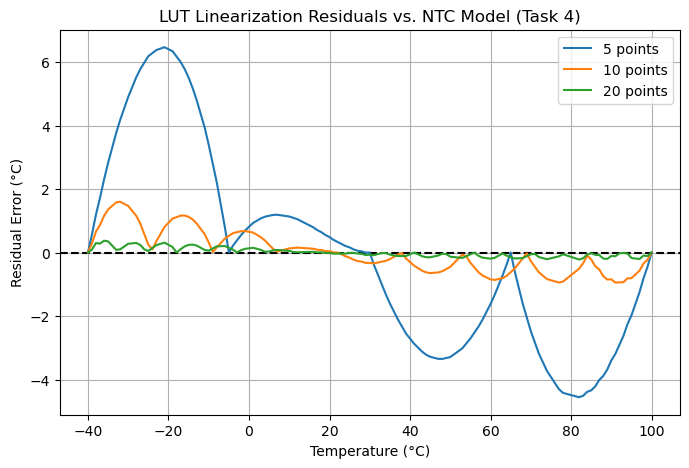

LUT with 5 points → Max interpolation error: 6.47 °C
LUT with 10 points → Max interpolation error: 1.60 °C
LUT with 20 points → Max interpolation error: 0.37 °C


In [6]:
# ===============================
# Task 4: Back-Conversion Method
# Compare LUT densities (5, 10, 20 points)
# ===============================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Parameters ---
Vin = 3.3
Vref = 3.3
ADC_bits = 12
ADC_steps = 2**ADC_bits
Rf_nom = 10_000

R0 = 10_000     # 10kΩ at 25°C
T0 = 25 + 273.15
B_nom = 3950    # K

# --- NTC model ---
def R_ntc(temp_C, R0=R0, B=B_nom):
    T = temp_C + 273.15
    return R0 * np.exp(B*((1/T) - (1/T0)))

def V_out(temp_C, Rf=Rf_nom, Vin=Vin):
    R = R_ntc(temp_C)
    return Vin * R / (R + Rf)

def adc_code(temp_C):
    V = np.minimum(V_out(temp_C), Vref)   # clip to ADC range
    return np.round(V / Vref * (ADC_steps-1)).astype(int)

# --- Task 4: compare different LUT sizes ---
lut_point_options = [5, 10, 20]   # LUT sizes to test
results = {}

plt.figure(figsize=(8,5))
plt.axhline(0, color="k", linestyle="--")

for n_points in lut_point_options:
    # Build LUT across -40…100 °C
    lut_temps = np.linspace(-40, 100, n_points)
    lut_adc = adc_code(lut_temps)

    # Remove duplicates if saturation occurs
    lut_df = pd.DataFrame({"Temp_C": lut_temps, "ADC": lut_adc})
    lut_df = lut_df.drop_duplicates(subset="ADC", keep="first")

    adc_table = lut_df["ADC"].values
    temp_table = lut_df["Temp_C"].values

    def adc_to_temp(adc_value):
        return np.interp(adc_value, adc_table[::-1], temp_table[::-1])

    # Dense test grid
    test_temps = np.arange(-40, 101, 1)
    true_adc = adc_code(test_temps)
    reconstructed = [adc_to_temp(adc) for adc in true_adc]
    residuals = test_temps - np.array(reconstructed)

    # Save max error
    results[n_points] = np.max(np.abs(residuals))

    # Plot residuals
    plt.plot(test_temps, residuals, label=f"{n_points} points")

plt.xlabel("Temperature (°C)")
plt.ylabel("Residual Error (°C)")
plt.title("LUT Linearization Residuals vs. NTC Model (Task 4)")
plt.grid(True)
plt.legend()
plt.show()

# --- Print summary ---
for n, err in results.items():
    print(f"LUT with {n} points → Max interpolation error: {err:.2f} °C")


## 7. Uncertainty Estimation

When several independent error sources affect a measurement, they do **not** simply add linearly.  
Instead, if the errors are **uncorrelated random variables**, their combined effect is estimated using the **root-sum-square (RSS)** method:

$$
\sigma_\text{total} = \sqrt{ \sigma_1^2 + \sigma_2^2 + \dots + \sigma_n^2 }
$$

where:
- $\sigma_i$ = standard deviation or maximum contribution of error source \(i\)  
- $\sigma_\text{total}$ = overall standard deviation (or worst-case combined error estimate)

### 7.1 Example: NTC Measurement

Suppose we have the following independent error contributions (1σ values):

- NTC tolerance: **±1.0 °C**  
- Fixed resistor tolerance: **±0.3 °C**  
- ADC quantization: **±0.2 °C**  
- Lookup/fit residual: **±0.5 °C**  
- Noise: **±0.4 °C**

Then the combined uncertainty is:

$$
\sigma_\text{total} =
\sqrt{(1.0)^2 + (0.3)^2 + (0.2)^2 + (0.5)^2 + (0.4)^2}
$$

$$
\sigma_\text{total} = \sqrt{1.00 + 0.09 + 0.04 + 0.25 + 0.16} = \sqrt{1.54} \approx 1.24 \,\text{°C}
$$

So the overall expected uncertainty is about **±1.2 °C (k=1)**.

### Monte Carlo Simulation

The RSS estimate assumes independence and Gaussian-like behavior.  
To verify or refine this estimate, we can perform a **Monte Carlo simulation**:

1. Randomly generate many samples of each error source, drawn from its distribution (e.g., Gaussian or uniform).  
2. Sum their combined effect for each trial.  
3. Compute the resulting distribution of the total error.  
4. Report mean and standard deviation as uncertainty.

Monte Carlo gives a more realistic picture when errors are not perfectly Gaussian or when nonlinearities are involved.



Monte Carlo mean error: -0.00 °C
Monte Carlo 1σ uncertainty: 1.24 °C


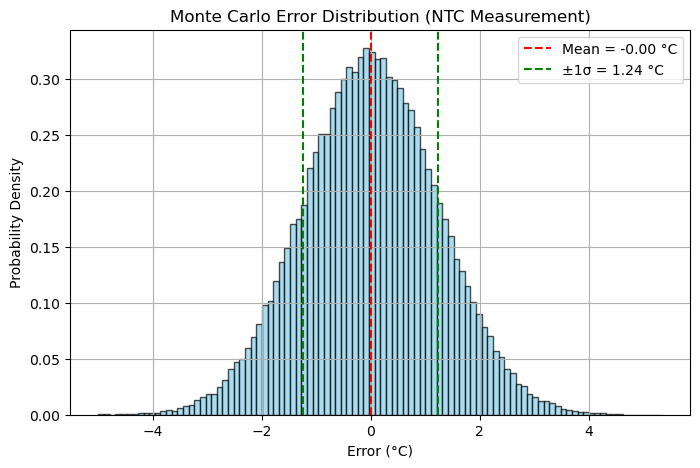

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Number of Monte Carlo trials
N = 100000

# Error sources (1σ approximations, in °C)
sigma_ntc = 1.0   # NTC tolerance
sigma_rf  = 0.3   # Fixed resistor tolerance
sigma_adc = 0.2   # ADC quantization
sigma_fit = 0.5   # Fit residuals
sigma_noise = 0.4 # Noise

# Generate random errors (assume Gaussian, mean=0)
err_ntc   = np.random.normal(0, sigma_ntc, N)
err_rf    = np.random.normal(0, sigma_rf, N)
err_adc   = np.random.normal(0, sigma_adc, N)
err_fit   = np.random.normal(0, sigma_fit, N)
err_noise = np.random.normal(0, sigma_noise, N)

# Total error = sum of all contributions
err_total = err_ntc + err_rf + err_adc + err_fit + err_noise

# Monte Carlo statistics
mean_err = np.mean(err_total)
std_err = np.std(err_total)

print(f"Monte Carlo mean error: {mean_err:.2f} °C")
print(f"Monte Carlo 1σ uncertainty: {std_err:.2f} °C")

# Plot histogram
plt.figure(figsize=(8,5))
plt.hist(err_total, bins=100, density=True, alpha=0.7, color="skyblue", edgecolor="k")
plt.axvline(mean_err, color="red", linestyle="--", label=f"Mean = {mean_err:.2f} °C")
plt.axvline(mean_err + std_err, color="green", linestyle="--", label=f"±1σ = {std_err:.2f} °C")
plt.axvline(mean_err - std_err, color="green", linestyle="--")
plt.title("Monte Carlo Error Distribution (NTC Measurement)")
plt.xlabel("Error (°C)")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()

### 7.2 End-to-End Monte Carlo with Boxplot Visualization

**End-to-end Monte Carlo** means simulating the *entire measurement chain*, from the physical NTC thermistor 
all the way to the final temperature estimate. Each simulated test run corresponds picking another NTC and resistor component from manufacturer production and placing them into a new circuit. Instead of just adding error sources in a simplified way, 
we inject variations into each stage:

1. **NTC tolerance** (variation in R25).  
2. **B-parameter variation** (affects slope of the resistance–temperature curve).  
3. **Fixed resistor tolerance** in the divider.  
4. **Measurement noise** at the ADC input.  
5. **ADC quantization**.  
6. **Back-conversion** using the lookup table with interpolation.  

This provides a realistic picture of how the system performs, including nonlinear effects and interactions 
between error sources.

---

**Boxplots** are a statistical way to visualize the distribution of errors at each test temperature:

- The **box** shows the interquartile range (middle 50% of values).  
- The **line inside the box** is the median error.  
- The **whiskers** extend to show most of the remaining data.  
- **Outliers** are shown as individual points beyond the whiskers.  

---

**What is shown in the simulation output?**

For each true temperature (from –40 °C to 100 °C in 10 °C steps), the simulation runs thousands of random trials, 
each with different NTC, resistor, and noise variations. The back-converted temperature is compared with the 
true temperature, and the error distribution is collected.

The boxplot chart shows:
- How much **bias** exists (median shifted above or below zero).  
- How much **random uncertainty** there is (height of the box/whiskers).  
- How errors change with temperature (some ranges are more sensitive to variation than others).  

This allows us to judge the **practical accuracy** of the measurement system, rather than just relying on 
theoretical tolerance stacking.

The histogram shows the details at 20 deg C simulation point, showing the distribution of errors. 


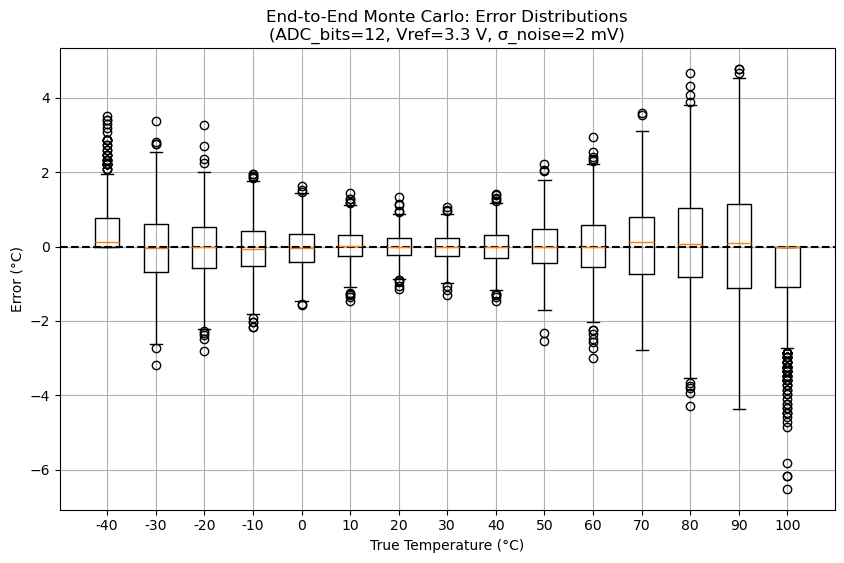

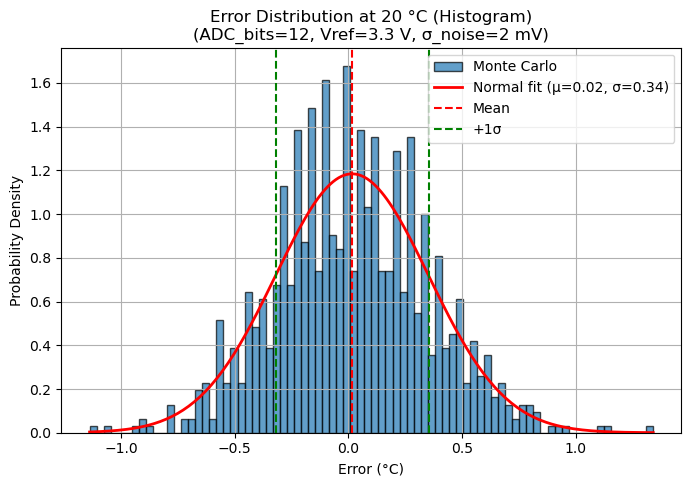

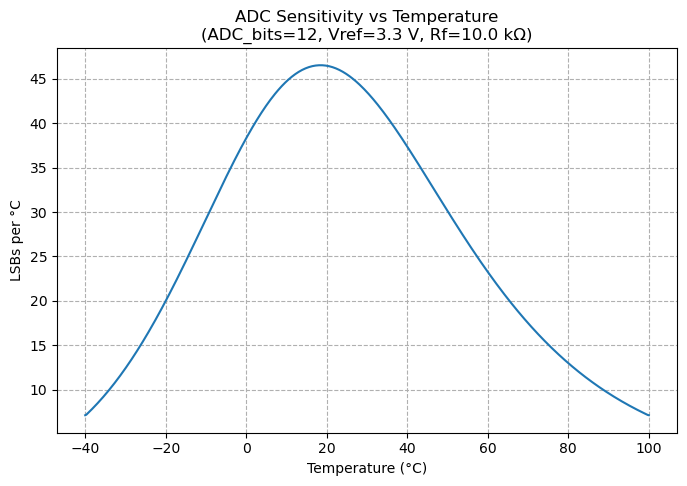

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm   # for Gaussian PDF

# =========================
# Parameters (base setup)
# =========================
Vin = 3.3

# --- ADC reference voltage ---
Vref = 3.3        # teacher default
# Vref = 5.0      # Task 3: try 5 V

# --- ADC resolution (bits) ---
ADC_bits = 12     # teacher default
# ADC_bits = 10       # Task 3: try 10-bit

ADC_steps = 2**ADC_bits
V_LSB = Vref / ADC_steps   # ADC step size [V]

# --- Thermistor & divider ---
R0 = 10_000          # NTC at 25 °C [ohm]
T0 = 25 + 273.15     # reference temperature [K]
B_nom = 3950         # B-constant [K]
Rf_nom = 10_000      # divider resistor [ohm]

# --- Tolerances ---
tol_Rf  = 0.01       # fixed resistor tolerance (1%)
# tol_Rf = 0.05        # 5% (Task 2 test)

tol_R25 = 0.01       # NTC R25 tolerance (1%)
# tol_R25 = 0.05       # 5% (Task 1 test)

tol_B   = 0.02       # NTC B tolerance (2%)
# tol_B   = 0.10       # 10% (Task 1 test)

# --- Noise (Volts, 1-sigma) ---
sigma_noise = 0.002   # teacher default: 2 mV
# sigma_noise = 0.010      # Task 3: 10 mV

# --- Monte Carlo samples per temperature ---
N = 1000

# =========================
# Models
# =========================
def R_ntc(temp_C, R0=R0, B=B_nom):
    """NTC resistance model using the B-parameter equation."""
    T = temp_C + 273.15
    return R0 * np.exp(B*((1/T) - (1/T0)))

def V_divider(R_ntc_val, Rf=Rf_nom, Vin=Vin):
    """Voltage divider output for NTC in series with fixed resistor."""
    return Vin * R_ntc_val / (Rf + R_ntc_val)

def adc_code(V):
    """Quantize voltage to ADC code with clipping at Vref."""
    V_clipped = np.minimum(V, Vref)
    return np.round(V_clipped / Vref * (ADC_steps - 1)).astype(int)

# =========================
# Build LUT (nominal)
# =========================
lut_temps = np.linspace(-40, 100, 50)
lut_adc = adc_code(V_divider(R_ntc(lut_temps, R0, B_nom), Rf_nom, Vin))

# Sort for monotonic interpolation
sort_idx = np.argsort(lut_adc)
lut_adc_sorted = lut_adc[sort_idx]
lut_temps_sorted = lut_temps[sort_idx]

def adc_to_temp(adc_value):
    """Linear interpolation from ADC code to temperature (LUT-based)."""
    return np.interp(adc_value, lut_adc_sorted, lut_temps_sorted)

# =========================
# End-to-end Monte Carlo
# =========================
test_temps = np.arange(-40, 101, 10)
all_errors = []

for T_true in test_temps:
    # Randomized component parameters
    R0_samples = R0 * (1 + np.random.normal(0, tol_R25, N))
    B_samples  = B_nom * (1 + np.random.normal(0, tol_B, N))
    Rf_samples = Rf_nom * (1 + np.random.normal(0, tol_Rf, N))

    # NTC resistances with R0 + B variations
    T_kelvin = T_true + 273.15
    R_ntc_samples = R0_samples * np.exp(B_samples * ((1/T_kelvin) - (1/T0)))

    # Divider voltages
    V_samples = Vin * R_ntc_samples / (Rf_samples + R_ntc_samples)

    # Add input noise
    V_samples += np.random.normal(0, sigma_noise, N)

    # ADC quantization
    adc_samples = adc_code(V_samples)

    # Back-conversion (LUT)
    T_est = np.array([adc_to_temp(adc) for adc in adc_samples])

    # Store temperature errors
    all_errors.append(T_est - T_true)

# =========================
# Boxplot of errors
# =========================
plt.figure(figsize=(10, 6))
plt.boxplot(all_errors, positions=test_temps, widths=5, showfliers=True)
plt.axhline(0, color="k", linestyle="--")
plt.xlabel("True Temperature (°C)")
plt.ylabel("Error (°C)")
plt.title(f"End-to-End Monte Carlo: Error Distributions\n"
          f"(ADC_bits={ADC_bits}, Vref={Vref} V, σ_noise={sigma_noise*1000:.0f} mV)")
plt.grid(True)
plt.show()

# =========================
# Histogram at 20 °C
# =========================
T_focus = 20
idx = np.where(test_temps == T_focus)[0][0]
errors_focus = all_errors[idx]

mu = np.mean(errors_focus)
sigma = np.std(errors_focus)

plt.figure(figsize=(8, 5))
counts, bins, patches = plt.hist(
    errors_focus, bins=80, density=True, alpha=0.7,
    edgecolor="k", label="Monte Carlo"
)

x = np.linspace(min(errors_focus), max(errors_focus), 200)
pdf = norm.pdf(x, mu, sigma)
plt.plot(x, pdf, "r-", lw=2, label=f"Normal fit (μ={mu:.2f}, σ={sigma:.2f})")

plt.axvline(mu, color="red", linestyle="--", label="Mean")
plt.axvline(mu + sigma, color="green", linestyle="--", label="+1σ")
plt.axvline(mu - sigma, color="green", linestyle="--")

plt.title(f"Error Distribution at {T_focus} °C (Histogram)\n"
          f"(ADC_bits={ADC_bits}, Vref={Vref} V, σ_noise={sigma_noise*1000:.0f} mV)")
plt.xlabel("Error (°C)")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()

# =========================
# Quick view: ADC sensitivity (LSBs/°C)
# =========================
temps = np.linspace(-40, 100, 500)
V_curve = [V_divider(R_ntc(T), Rf_nom, Vin) for T in temps]
dVdT = np.gradient(V_curve, temps)
lsb_per_deg = np.abs(dVdT / V_LSB)

plt.figure(figsize=(8, 5))
plt.plot(temps, lsb_per_deg)
plt.xlabel("Temperature (°C)")
plt.ylabel("LSBs per °C")
plt.title(f"ADC Sensitivity vs Temperature\n"
          f"(ADC_bits={ADC_bits}, Vref={Vref} V, Rf={Rf_nom/1000:.1f} kΩ)")
plt.grid(True, which="both", linestyle="--")
plt.show()

---

# 🎓 Tasks: Exploring the Measurement Chain

The goal is to understand how different sources of uncertainty affect the accuracy of temperature measurement.

---

## Task 1: NTC Parameters

The NTC thermistor is the first source of uncertainty.

- Modify the **R25 tolerance** (e.g. change from 1% → 5%).  
- Modify the **B-parameter tolerance** (e.g. 2% → 10%).  
- Run the Monte Carlo simulation again.  
- Observe:  
  - How do the boxplots change?  
  - Does the error distribution stay symmetric or does it shift (bias)?  
  - Which is more critical: R25 tolerance or B tolerance?

👉 *Engineering context:* Cheap thermistors often have higher B spread. Is it worth paying more for tighter B spec?

---

**How do the boxplots change?**  
They get taller (errors increase).

**Does the error distribution stay symmetric or does it shift (bias)?**  
Mostly stays symmetric.

**Which is more critical: R25 tolerance or B tolerance?**  
B tolerance is more critical.

👉 This was checked in section 7.2 (End-to-End Monte Carlo) by changing tol_R25 and tol_B.  
This is also shown in section 2.4 (Tolerance Effects).

---

## Task 2: Voltage Divider

The voltage divider resistor also contributes error.

- Change **Rf_nom** from 10kΩ to another value (e.g. 4.7kΩ, 47kΩ).  
- Increase or decrease **Rf tolerance** (1% → 5%).  
- Re-run the simulation.  
- Observe:  
  - How does resistor choice shift the sensitivity curve?  
  - Is the maximum error larger at hot or cold temperatures?  
  - Which resistor value gives the most balanced sensitivity?

👉 *Engineering context:* Divider ratio affects both signal range and thermal response curve. Choosing Rf well reduces error.

---

**How does resistor choice shift the sensitivity curve?**  
Smaller resistors move the curve to higher temperatures, larger ones move it to lower temperatures.  
👉 This was checked in section 4 (ADC Sensitivity vs Temperature) by changing Rf_nom (4.7 kΩ, 10 kΩ, 47 kΩ).

**Is the maximum error larger at hot or cold temperatures?**  
The maximum error is larger at hot temperatures while errors are smallest near room temperature.  
👉 This was observed in section 7.2 (Monte Carlo boxplots).

**Which resistor value gives the most balanced sensitivity?**  
The 10 kΩ resistor gives the most balanced sensitivity across the temperature range.

---

## Task 3: ADC and Noise

The ADC stage introduces its own limitations.

- Change **ADC resolution** (e.g. 10-bit vs 12-bit).  
- Change **ADC reference voltage** (e.g. 3.1 V → 5 V).  
- Modify ADC model to add random noise voltage of **noise amplitude** (σ = 2 mV → 10 mV).  
- Observe:  
  - How does quantization error appear in the histograms?  
  - How much does noise spread the boxplots?  
  - Is quantization more critical at low or high temperatures?

👉 *Engineering context:* Low-cost MCUs often have noisy ADCs. External ADCs may provide better resolution.

---

**How does quantization error appear in the histograms?**  
It looks like a comb with separated bars instead of a smooth curve (changed ADC_bits from 12 to 10).

**How much does noise spread the boxplots?**  
More noise makes the boxes and whiskers taller, less noise makes them shorter (changed sigma_noise from 0.002 to 0.010).

**Is quantization more critical at low or high temperatures?**  
QQuantization is more critical at the extremes (cold and hot), while it is least critical around room temperature.  
The ADC Sensitivity (LSBs/°C) plot shows that sensitivity is low at the edges and highest in the middle.

👉 Checked in section 7.2 (End-to-End Monte Carlo and Sensitivity plots).

---

## Task 4: Back-Conversion Method

Finally, the algorithm for turning ADC codes back into temperature matters.

- Change the **number of LUT points** (e.g. 5, 10, 20).  
- Run the simulations and compare linearization residuals.  
- Observe:  
  - How much does LUT density affect accuracy?  
  - Which method provides the smallest bias?  
  - Where in the temperature range does interpolation fail worst?

👉 *Engineering context:* Limited MCU memory restricts LUT size. Engineers must balance memory vs. accuracy.

---

**How much does LUT density affect accuracy?**  
The fewer points, the bigger the error. With 5 points the error goes up to about 6.5 °C, with 10 points about 1.6 °C, and with 20 points only about 0.4 °C.

**Which method provides the smallest bias?**  
The 20-point LUT, because its residual line (green) stays closest to zero.

**Where in the temperature range does interpolation fail worst?**  
It fails most at the edges (around −40 °C and 100 °C) and on the colder side of the curve where it is steeper.

👉 This was checked in section 6.5 (Lookup Table with Linear Interpolation) while running the Task 4 block.

---

## Task 5: Free Exploration

Try combining multiple parameter changes at once:

- A low-cost NTC (large B spread) with a poor tolerance divider.  
- A high-resolution ADC with low noise.  
- A very sparse LUT.  

Observe how different trade-offs play out in the **boxplot distributions** and **error histograms**.

---

**Low-cost NTC + poor divider + sparse LUT**

- **Boxplot:** very wide → errors move a lot up and down in °C, which means unstable and inaccurate.

- **Histogram:** wide and flat → errors are spread out. The peak is low, so many results have big errors.

- **LUT residuals:** the line goes far up and down from zero → LUT gives wrong values. In this bad case (sparse LUT), errors reach about ±6 °C, especially at the edges.

**High-res ADC + low noise**

- **Boxplot:** narrow → errors stay close to zero, so results are stable and accurate.

- **Histogram:** narrow and tall → most errors are close to zero. The peak is high, so most results are correct.

- **LUT residuals:** the line stays almost flat near zero → errors are below ±0.5 °C, which means high accuracy.

👉 See the graphs below.


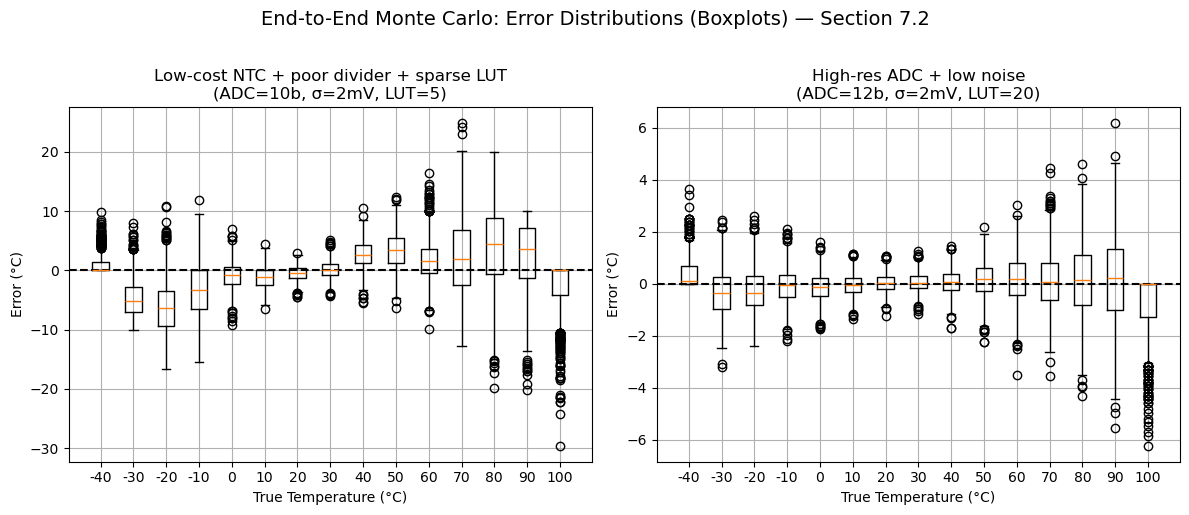

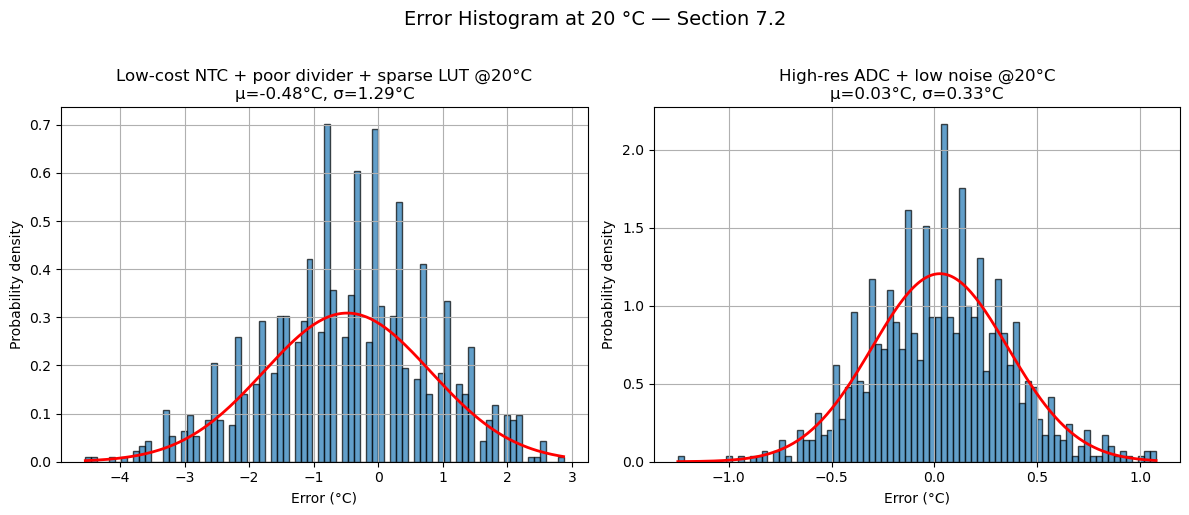

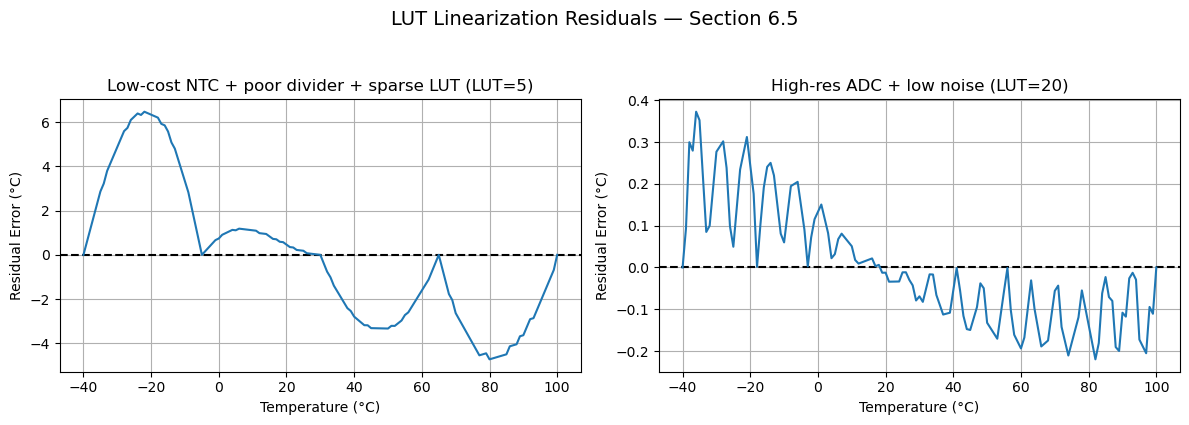

In [9]:
# ================================
# Task 5 – Free Exploration
# Compare scenarios by changing multiple parameters at once
# ================================
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# ---------- Helpers (copied locally) ----------
def R_ntc(temp_C, R0, B, T0):
    T = temp_C + 273.15
    return R0 * np.exp(B*((1/T) - (1/T0)))

def V_divider(R_ntc_val, Rf, Vin):
    return Vin * R_ntc_val / (Rf + R_ntc_val)

def build_lut(Vin, Vref, ADC_bits, R0, B, T0, Rf_nom, lut_points):
    ADC_steps = 2**ADC_bits
    def adc_code_from_V(V):
        Vc = np.minimum(V, Vref)
        return np.round(Vc / Vref * (ADC_steps - 1)).astype(int)

    lut_temps = np.linspace(-40, 100, lut_points)
    lut_adc = adc_code_from_V(V_divider(R_ntc(lut_temps, R0, B, T0), Rf_nom, Vin))
    sort_idx = np.argsort(lut_adc)
    return lut_adc[sort_idx], lut_temps[sort_idx], adc_code_from_V

def adc_to_temp(adc_value, lut_adc_sorted, lut_temps_sorted):
    return np.interp(adc_value, lut_adc_sorted, lut_temps_sorted)

def run_monte_carlo(cfg, N=1000, temps_grid=np.arange(-40, 101, 10), T_focus=20):
    # Unpack
    Vin        = cfg["Vin"];    Vref      = cfg["Vref"];     ADC_bits  = cfg["ADC_bits"]
    R0         = cfg["R0"];     T0        = cfg["T0"];       B_nom     = cfg["B_nom"]
    Rf_nom     = cfg["Rf_nom"]; tol_Rf    = cfg["tol_Rf"];   tol_R25   = cfg["tol_R25"]
    tol_B      = cfg["tol_B"];  sigma_n   = cfg["sigma_noise"]; lut_pts = cfg["lut_points"]

    # Build LUT with nominal params
    lut_adc_sorted, lut_temps_sorted, adc_code_from_V = build_lut(
        Vin, Vref, ADC_bits, R0, B_nom, T0, Rf_nom, lut_pts
    )

    ADC_steps = 2**ADC_bits
    def adc_code_from_V_runtime(V):
        Vc = np.minimum(V, Vref)
        return np.round(Vc / Vref * (ADC_steps - 1)).astype(int)

    all_errors = []
    for T_true in temps_grid:
        # Randomize component parameters
        R0_s = R0 * (1 + np.random.normal(0, tol_R25, N))
        B_s  = B_nom * (1 + np.random.normal(0, tol_B,   N))
        Rf_s = Rf_nom * (1 + np.random.normal(0, tol_Rf, N))

        # Forward pass
        T_K = T_true + 273.15
        Rntc_s = R0_s * np.exp(B_s*((1/T_K) - (1/T0)))
        V_s    = Vin * Rntc_s / (Rf_s + Rntc_s)
        V_s   += np.random.normal(0, sigma_n, N)     # add noise
        adc_s  = adc_code_from_V_runtime(V_s)        # quantize

        # Back-conversion via LUT
        T_est  = np.interp(adc_s, lut_adc_sorted, lut_temps_sorted)
        all_errors.append(T_est - T_true)

    # Histogram focus
    idx_focus = np.where(temps_grid == T_focus)[0][0]
    errors_focus = np.array(all_errors[idx_focus])

    # LUT residuals (section 6.5 style)
    test_temps = np.arange(-40, 101, 1)
    V_dense = V_divider(R_ntc(test_temps, R0, B_nom, T0), Rf_nom, Vin)
    adc_dense = np.round(np.minimum(V_dense, Vref) / Vref * (ADC_steps - 1)).astype(int)
    recon = np.interp(adc_dense, lut_adc_sorted, lut_temps_sorted)
    residuals = test_temps - recon

    return {
        "temps_grid": temps_grid,
        "all_errors": all_errors,
        "errors_focus": errors_focus,
        "residuals": residuals
    }

# ---------- Define scenarios ----------
# You can add/remove scenarios here.
SCENARIOS = [
    {
        "name": "Low-cost NTC + poor divider + sparse LUT",
        "Vin": 3.3, "Vref": 3.3, "ADC_bits": 10,
        "R0": 10_000, "T0": 25+273.15, "B_nom": 3950,
        "Rf_nom": 10_000,
        "tol_Rf": 0.05,     # poor divider tolerance
        "tol_R25": 0.01,
        "tol_B": 0.10,      # large B spread
        "sigma_noise": 0.002,  # keep default
        "lut_points": 5     # very sparse LUT
    },
    {
        "name": "High-res ADC + low noise",
        "Vin": 3.3, "Vref": 3.3, "ADC_bits": 12,
        "R0": 10_000, "T0": 25+273.15, "B_nom": 3950,
        "Rf_nom": 10_000,
        "tol_Rf": 0.01,
        "tol_R25": 0.01,
        "tol_B": 0.02,
        "sigma_noise": 0.002,  # low noise
        "lut_points": 20
    },
]

# ---------- Run & collect ----------
results = []
for cfg in SCENARIOS:
    res = run_monte_carlo(cfg)
    results.append((cfg, res))

# ---------- PLOTS ----------
# 1) Boxplots of errors (section 7.2 style)
cols = len(SCENARIOS)
plt.figure(figsize=(6*cols, 5))
for i, (cfg, res) in enumerate(results, 1):
    plt.subplot(1, cols, i)
    plt.boxplot(res["all_errors"], positions=res["temps_grid"], widths=5, showfliers=True)
    plt.axhline(0, color="k", linestyle="--")
    plt.title(f"{cfg['name']}\n(ADC={cfg['ADC_bits']}b, σ={cfg['sigma_noise']*1000:.0f}mV, LUT={cfg['lut_points']})")
    plt.xlabel("True Temperature (°C)")
    plt.ylabel("Error (°C)")
    plt.grid(True)
plt.suptitle("End-to-End Monte Carlo: Error Distributions (Boxplots) — Section 7.2", y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

# 2) Histograms at 20°C
plt.figure(figsize=(6*cols, 5))
for i, (cfg, res) in enumerate(results, 1):
    plt.subplot(1, cols, i)
    e = res["errors_focus"]
    mu, sigma = np.mean(e), np.std(e)
    plt.hist(e, bins=80, density=True, alpha=0.7, edgecolor="k")
    x = np.linspace(min(e), max(e), 200)
    plt.plot(x, norm.pdf(x, mu, sigma), "r-", lw=2)
    plt.title(f"{cfg['name']} @20°C\nμ={mu:.2f}°C, σ={sigma:.2f}°C")
    plt.xlabel("Error (°C)"); plt.ylabel("Probability density")
    plt.grid(True)
plt.suptitle("Error Histogram at 20 °C — Section 7.2", y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

# 3) LUT linearization residuals (section 6.5 style)
plt.figure(figsize=(6*cols, 4))
for i, (cfg, res) in enumerate(results, 1):
    plt.subplot(1, cols, i)
    plt.axhline(0, color="k", linestyle="--")
    plt.plot(np.arange(-40, 101, 1), res["residuals"])
    plt.title(f"{cfg['name']} (LUT={cfg['lut_points']})")
    plt.xlabel("Temperature (°C)"); plt.ylabel("Residual Error (°C)")
    plt.grid(True)
plt.suptitle("LUT Linearization Residuals — Section 6.5", y=1.05, fontsize=14)
plt.tight_layout()
plt.show()